# Linear Regression Using OLS(Ordinary Least Square)

## Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import *

__Generating the data using the class make_regression__

In [2]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1,noise= 10,random_state = 100)

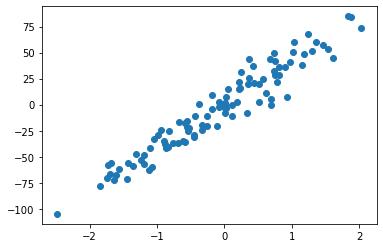

In [3]:
plt.scatter(X, y);

__Perform train test split__

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

__Making our own Linear Regression Class__

In [13]:
class LR_OLS:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        
        
        return self.m * X_test + self.b

In [14]:
LR = LR_OLS()

In [15]:
LR.fit(X_train, y_train)

[41.54859677]
[0.66171134]


In [16]:
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [17]:
# calculate r2score

print(" The r2_score for train using gradient descent class :", r2_score(y_train, y_pred_train))
print(" The r2_score for test using gradient descent class :", r2_score(y_test, y_pred_test))

 The r2_score for train using gradient descent class : 0.9407182357987658
 The r2_score for test using gradient descent class : 0.8498819590329354


### Check with sklearn LinearRegression class:

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
LR_1 = LinearRegression()

LR_1.fit(X_train, y_train)

LinearRegression()

In [20]:
y_lr_train = LR_1.predict(X_train)
y_lr_test = LR_1.predict(X_test)

In [21]:
# calculate r2score

print(" The r2_score for train using sklearn LR class :", r2_score(y_train, y_lr_train))
print(" The r2_score for test using sklearn LR class :", r2_score(y_test, y_lr_test))

 The r2_score for train using sklearn LR class : 0.9407182357987658
 The r2_score for test using sklearn LR class : 0.8498819590329352


In [22]:
print("The coeffients are : ", LR_1.coef_)
print("The intercepts are : ", LR_1.intercept_)

The coeffients are :  [41.54859677]
The intercepts are :  0.6617113413547226


## Visualizing the Best Fit Line

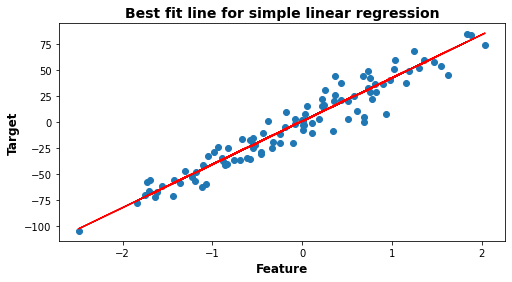

In [23]:
plt.figure(figsize=(8,4))
plt.scatter(X, y)
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title("Best fit line for simple linear regression",  fontweight = "bold", fontsize =14)
plt.xlabel('Feature', fontweight = "bold", fontsize =12)
plt.ylabel('Target', fontweight = "bold", fontsize =12);

__The red line in the graph represents the best fit line.__

### Conclusion :
* The coefficients and intercepts for both sklearn Linear Regression class and the class defined by our own are same.
* Also, r2scores for both the classes are also equal.
* Hence, we have developed our own Linear Regression Class using OLS.